SVM, or Support Vector Machine, is ideal for complex classification tasks. It finds the best separating hyperplane in this data, perfect for categorizing states like normal or disrupted metro service. Given the dataset's diversity and dimensions, SVM can effectively distinguish different operational conditions.

Linear vs. RBF SVM:

Linear SVM is fast and effective for linearly separable data. It's simpler, but less effective for complex, non-linear relationships.
RBF SVM excels in handling non-linear data. It's more suitable for datasets like these, where relationships aren't straightforward. However, it requires careful tuning of its parameters.


In Linear SVM, focus on 'C', the regularization parameter. Adjusted it to balance between a smooth decision surface and correctly classifying training examples.
For RBF SVM, 'C' and 'gamma' are key. 'Gamma' controls the reach of a training example. Find the right balance to avoid overfitting and ensure the model generalizes well. The use of GridSearchCV is a fine method to identify these optimal settings.

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9031
           1       0.98      0.99      0.99      8803

    accuracy                           0.99     17834
   macro avg       0.99      0.99      0.99     17834
weighted avg       0.99      0.99      0.99     17834



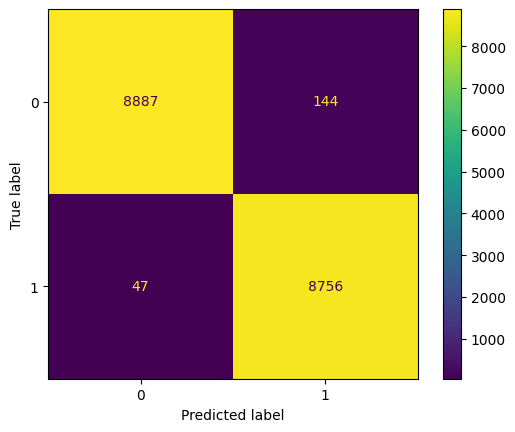

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('Group_14_Clean_Data.csv')
df = df.drop(columns=['Unnamed: 0', 'timestamp'])
label_column = 'status'
X = df.drop(label_column, axis=1)
y = df[label_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
tuned_parameters = [{
    'kernel': ['rbf'],
    'gamma': [1e-3, 1e-4],
    'C': [1, 10, 100, 1000]
    },
    {
    'kernel': ['linear'],
    'C': [1, 10, 100, 1000]
}]
svm_model = svm.SVC()
clf = GridSearchCV(svm_model, tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Best Model Hyperparameters:
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9031
           1       0.98      0.99      0.99      8803

    accuracy                           0.99     17834
   macro avg       0.99      0.99      0.99     17834
weighted avg       0.99      0.99      0.99     17834



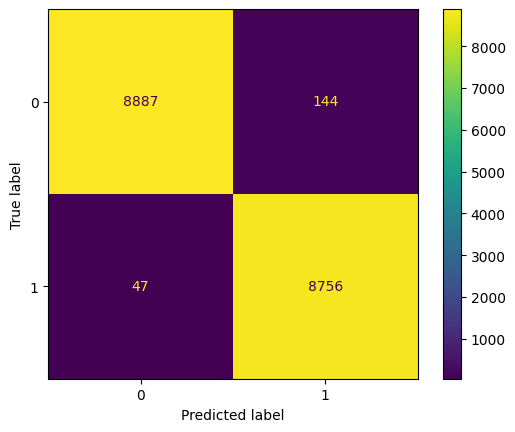

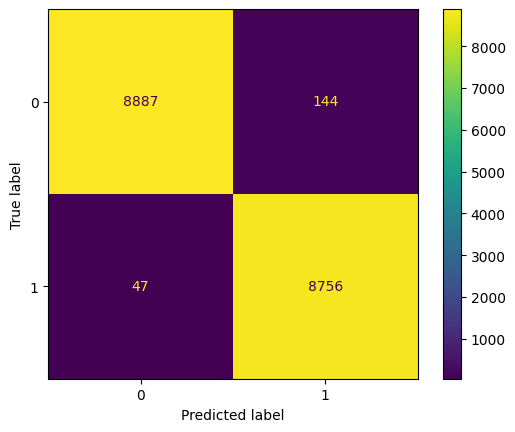

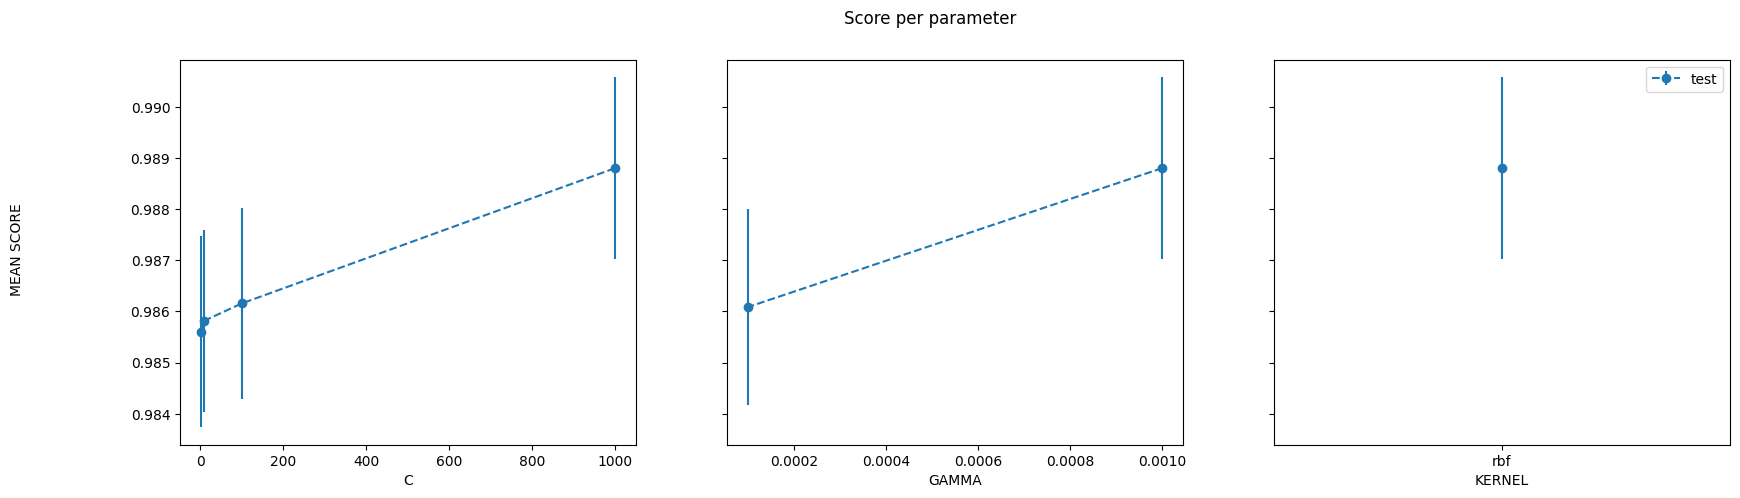

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv('Group_14_Clean_Data.csv')

# Drop unnecessary columns (if any)
df = df.drop(columns=['Unnamed: 0', 'timestamp'])

# Define the label column
label_column = 'status'

# Separate features (X) and labels (y)
X = df.drop(label_column, axis=1)
y = df[label_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values to have mean=0 and std=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the hyperparameters to search over in GridSearchCV
tuned_parameters = {
    'kernel': ['rbf'],
    'gamma': [1e-3, 1e-4],
    'C': [1, 10, 100, 1000]
}

# Create an SVM model
svm_model = svm.SVC()

# Perform GridSearchCV to find the best combination of hyperparameters
clf = GridSearchCV(svm_model, tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)

# Get the best model from the grid search
best_model = clf.best_estimator_

# Use the best model to make predictions on the test set
y_pred = best_model.predict(X_test)

# Print a classification report to evaluate the best model's performance
print("Best Model Hyperparameters:")
print(clf.best_params_)
print("\nClassification Report for the Best Model:")
print(classification_report(y_test, y_pred))

# Display a confusion matrix for further evaluation
disp = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
disp.plot()

# Define a function to plot the search results for hyperparameters
def plot_search_results(grid):
    """
    Params:
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

# Call the function to plot the hyperparameter search results
plot_search_results(clf)

This code represents a detailed implementation of a Support Vector Machine (SVM) for classifying data from the 'Group_14_Clean_Data.csv' dataset. Initially, it imports necessary libraries like Pandas for data manipulation, Scikit-learn for machine learning tasks, and Matplotlib for visualization. The dataset is loaded into a DataFrame, followed by the removal of unnecessary columns. The 'status' column is identified as the label, and the dataset is split into features and labels. A 70-30 split is applied to create training and testing sets. The features are standardized using the StandardScaler to have a mean of 0 and a standard deviation of 1. An SVM model with an RBF kernel is then set up, and a GridSearchCV is employed to tune the hyperparameters (kernel, gamma, and C) based on accuracy. The best model identified by GridSearchCV is utilized to predict the test data, and its performance is evaluated through a classification report and a confusion matrix. The code also includes a function to plot the results of the hyperparameter search, providing visual insights into the model's performance across different parameter settings. This comprehensive approach ensures that the SVM model is not only accurately tuned to the specific characteristics of the dataset but also provides clear insights into the model's decision-making process.